In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données
df_path = 'dataset_test2.csv'
df = pd.read_csv(df_path, low_memory=False)

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Entraîner le modèle randomforest
rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

(accuracy, report)


(0.8766555144941798,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.45      0.60     27821\n           1       0.88      0.98      0.93    109372\n\n    accuracy                           0.88    137193\n   macro avg       0.88      0.72      0.76    137193\nweighted avg       0.88      0.88      0.86    137193\n')

In [4]:
df = pd.read_csv('dataset_test2.csv')
df

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F,60000.0,48000.0
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F,40000.0,32000.0
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F,287000.0,215250.0
3,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F,517000.0,387750.0
4,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F,45000.0,36000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685957,MD,21224,MD,332431,60,20,1.0,1,0,NaN,N,P I F,50000.0,25000.0
685958,CA,92020,CA,314912,36,40,1.0,1,0,N,N,P I F,200000.0,150000.0
685959,OH,43221,IL,451120,60,6,1.0,1,0,NaN,N,P I F,70000.0,56000.0
685960,OH,43221,IL,451130,60,6,1.0,1,0,Y,N,P I F,85000.0,42500.0


In [5]:
import pandas as pd
df = pd.read_csv('dataset_test3.csv')
df

,State,Zip,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status
0,IN,47711,OH,451120,84,4,2.0,1,0,N,Y,P I F
1,IN,46526,IN,722410,60,2,2.0,1,0,N,Y,P I F
2,IN,47401,IN,621210,180,7,1.0,1,0,N,N,P I F
3,CT,6062,DE,332721,120,19,1.0,1,0,N,N,P I F
4,FL,34491,AL,811118,84,1,2.0,1,0,N,Y,P I F
...,...,...,...,...,...,...,...,...,...,...,...,...
685957,MD,21224,MD,332431,60,20,1.0,1,0,NaN,N,P I F
685958,CA,92020,CA,314912,36,40,1.0,1,0,N,N,P I F
685959,OH,43221,IL,451120,60,6,1.0,1,0,NaN,N,P I F
685960,OH,43221,IL,451130,60,6,1.0,1,0,Y,N,P I F


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test3.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

(accuracy, report)


(0.9349556747929546,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.78      0.83     27801\n           1       0.95      0.97      0.96    109367\n\n    accuracy                           0.93    137168\n   macro avg       0.92      0.88      0.89    137168\nweighted avg       0.93      0.93      0.93    137168\n')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test3.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

(accuracy, report)


(0.9349556747929546,
 '              precision    recall  f1-score   support\n\n      CHGOFF       0.89      0.78      0.83     27801\n       P I F       0.95      0.97      0.96    109367\n\n    accuracy                           0.93    137168\n   macro avg       0.92      0.88      0.89    137168\nweighted avg       0.93      0.93      0.93    137168\n')

Matrice de confusion pour le modèle Random Forest


,Predicted no,Predicted yes
Actual no,44697,66586
Actual yes,5663,431823


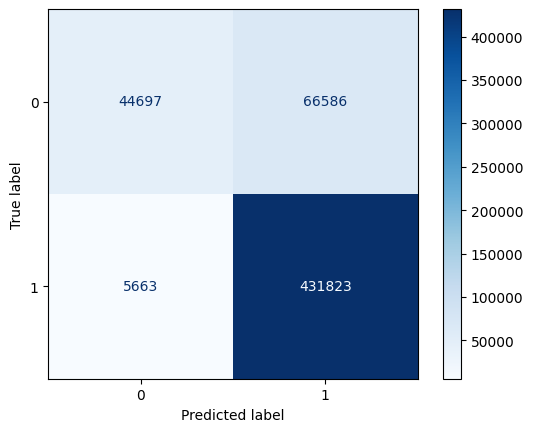

In [5]:
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_train_pred_rf = cross_val_predict(rf_pipeline, X_train, y_train)
cm_tr = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_tr = pd.DataFrame(cm_tr, index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_tr)

graph_cm_tr = ConfusionMatrixDisplay(cm_tr, display_labels=rf_pipeline.classes_)
graph_cm_tr.plot(cmap="Blues")

In [5]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Charger le jeu de données

df = pd.read_csv('dataset_test4.csv')

# Sélectionner les variables indépendantes et la variable cible
X = df.drop('MIS_Status', axis=1)
y = df['MIS_Status']

# Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)


# Identifier les variables catégorielles et numériques
cat_vars = X.select_dtypes(include=['object']).columns.tolist()
num_vars = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Créer les transformateurs pour les pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop='if_binary'))
])

# Combiner les transformateurs dans un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

# Créer la pipeline de traitement et de modélisation
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Séparer les données en ensembles d'entraînement et de test, stratifier sur y
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


rf_pipeline.fit(X_train, y_train)

#obtenir le nombre de caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
print(f"Nombre de caractéristiques après le prétraitement : {len(feature_names)}")

# Prédire les étiquettes sur l'ensemble de test
y_pred = rf_pipeline.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(accuracy, report)


Nombre de caractéristiques après le prétraitement : 118
0.9337280685822223               precision    recall  f1-score   support

      CHGOFF       0.88      0.78      0.83     27906
       P I F       0.95      0.97      0.96    109739

    accuracy                           0.93    137645
   macro avg       0.91      0.88      0.89    137645
weighted avg       0.93      0.93      0.93    137645



In [11]:
# Obtenir les importances des caractéristiques du modèle XGBoost
feature_importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Obtenir les noms des caractéristiques transformées
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Créer un DataFrame pour visualiser les importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Afficher les importances des caractéristiques
print(importance_df)

                Feature    Importance
2             num__Term  4.964537e-01
0              num__Zip  1.088685e-01
1            num__NAICS  9.198375e-02
3            num__NoEmp  5.914150e-02
4    num__FranchiseCode  2.927751e-02
..                  ...           ...
57    cat__BankState_AK  8.819664e-05
98    cat__BankState_PR  4.078787e-05
59    cat__BankState_AN  2.985471e-07
69    cat__BankState_GU  1.067654e-07
106   cat__BankState_VI  3.460426e-09

[118 rows x 2 columns]


c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Matrice de confusion pour le modèle Random Forest


,Predicted no,Predicted yes
Actual no,87267,24357
Actual yes,11799,427153


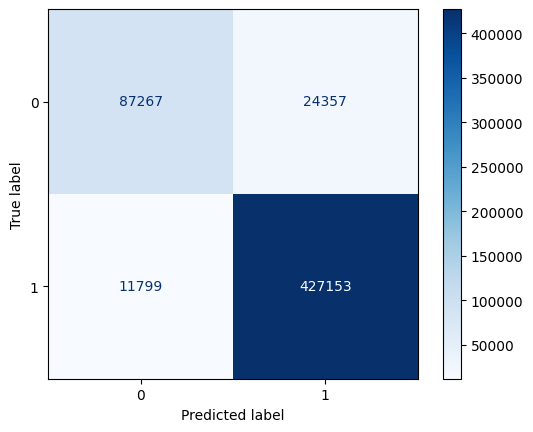

In [12]:
from sklearn.metrics import accuracy_score, average_precision_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_train_pred_rf = cross_val_predict(rf_pipeline, X_train, y_train)
cm_tr = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_tr = pd.DataFrame(cm_tr, index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_tr)

graph_cm_tr = ConfusionMatrixDisplay(cm_tr, display_labels=rf_pipeline.classes_)
graph_cm_tr.plot(cmap="Blues")

c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\Desktop\brief_classif_sba\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\socci\D

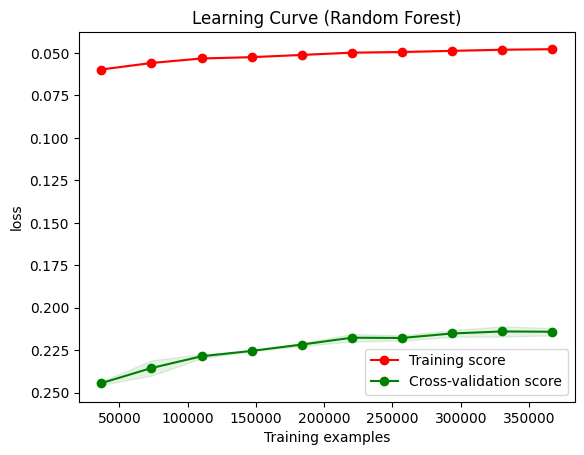

In [13]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

train_sizes, train_scores, validation_scores = learning_curve(
    estimator = rf_pipeline,
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 3,
    scoring = 'neg_log_loss'
)

#recuperation des moyennes et des écarts types(facultatif) à chaque cv
train_scores_mean = -train_scores.mean(axis = 1)
train_scores_std = train_scores.std(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_std = validation_scores.std(axis = 1)


plt.figure()
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("loss")
plt.gca().invert_yaxis() #inverser y car métrique de perte

# afficher les points
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

# relier les points
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha=0.1, color="g")


plt.legend()
plt.show()